In [97]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from lagged_coherence import *
import colorednoise as cn

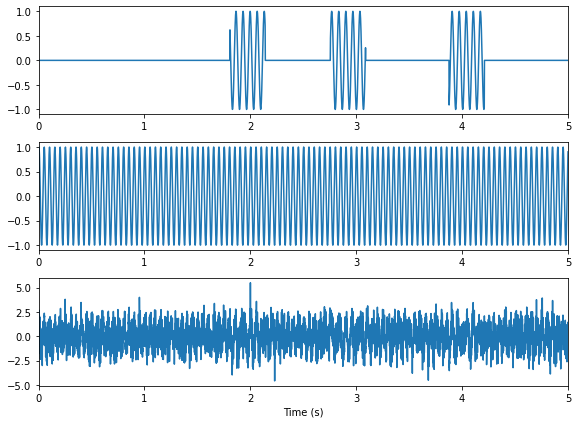

In [2]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

f1 = 15
f1_max_cycles=5
f1_bursts_per_trial=3
f2 = 20
w1 = 2. * np.pi * f1
w2 = 2. * np.pi * f2
signal=np.zeros((trials,len(time)))
s1s=np.zeros((trials,len(time)))
for i in range(trials):
    burst_starts=[]
    burst_stops=[]
    while len(burst_starts)<f1_bursts_per_trial:
        cycles=f1_max_cycles
        cycles_dur_s=cycles/f1
        dur=int(cycles_dur_s/dt)
        start=np.random.randint(int(T/dt)-dur)
        stop=start+dur
        overlap=False
        for (other_start,other_stop) in zip(burst_starts,burst_stops):
            if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                overlap=True
                break
        if not overlap:
            s1s[i,start:stop]=np.sin(w1 * (time[start:stop]+np.random.randn()))
            burst_starts.append(start)
            burst_stops.append(stop)
    s2=np.sin(w2 * (time+np.random.randn()))
    signal[i,:]=s1s[i,:]+s2+cn.powerlaw_psd_gaussian(0, len(time))#np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(time,s1s[0,:])
plt.xlim(time[[0,-1]])
plt.subplot(3,1,2)
plt.plot(time,s2)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,3)
plt.plot(time,signal[0,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [3]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lcs_classic=lagged_coherence_classic(signal, freqs, lags, srate)

In [4]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate)

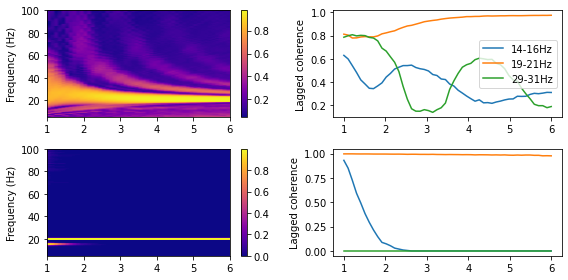

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(trial_lcs_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_classic[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_classic[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_classic[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.ylabel('Lagged coherence')
plt.legend()

plt.subplot(2,2,3)
i1=plt.imshow(np.mean(trial_lcs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,low_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0))
plt.ylabel('Lagged coherence')
plt.tight_layout()

In [6]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lplvs_classic=lagged_coherence_classic(signal, freqs, lags, srate, type='plv')

In [7]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,6,50)
trial_lplvs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='plv')

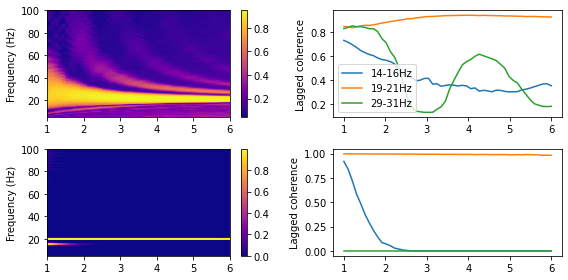

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(trial_lplvs_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_classic[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_classic[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_classic[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.ylabel('Lagged coherence')
plt.legend()

plt.subplot(2,2,3)
i1=plt.imshow(np.mean(trial_lplvs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,low_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0))
plt.ylabel('Lagged coherence')
plt.tight_layout()

In [9]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lacs_classic=lagged_coherence_classic(signal, freqs, lags, srate, type='amp_coh')

In [10]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lacs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='amp_coh')

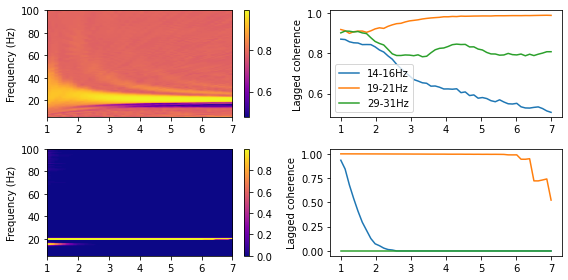

In [11]:
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
i1=plt.imshow(np.mean(trial_lacs_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_classic[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_classic[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_classic[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.ylabel('Lagged coherence')
plt.legend()

plt.subplot(2,2,3)
i1=plt.imshow(np.mean(trial_lacs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,low_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0))
plt.ylabel('Lagged coherence')
plt.tight_layout()

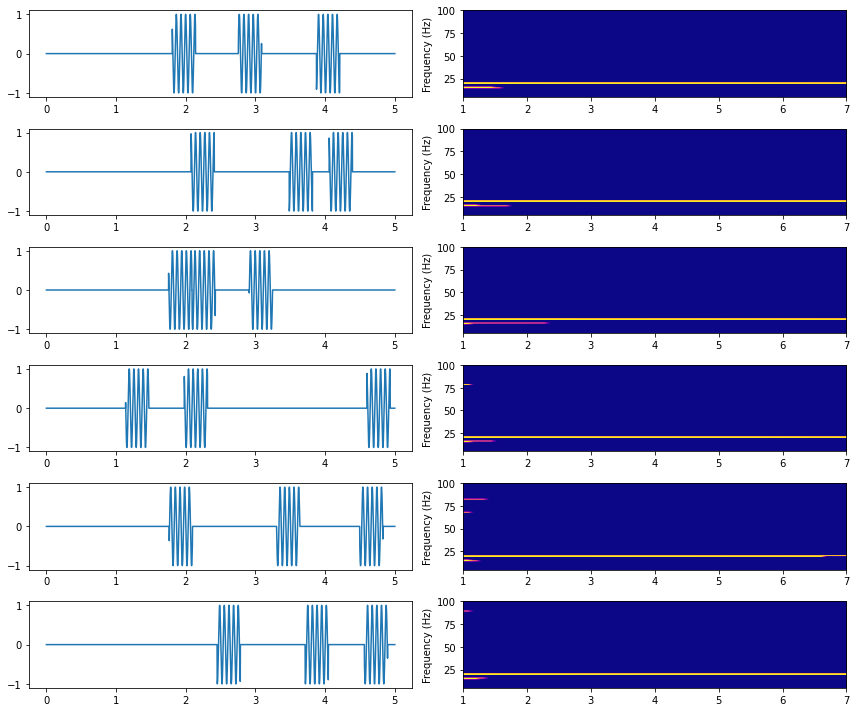

In [12]:
plt.figure(figsize=(12,10))
plt_idx=1
for i in range(6):
    plt.subplot(6,2,plt_idx)
    plt.plot(time,s1s[i,:])
    plt_idx+=1
    
    plt.subplot(6,2,plt_idx)
    i1=plt.imshow(trial_lcs_surrogate[i,:,:], aspect='auto', cmap='plasma', 
                  extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
                  origin='lower')
    if i>=trials-2:
        plt.xlabel('Lag (cycles)')
    plt.ylabel('Frequency (Hz)')
    plt_idx+=1
plt.tight_layout()

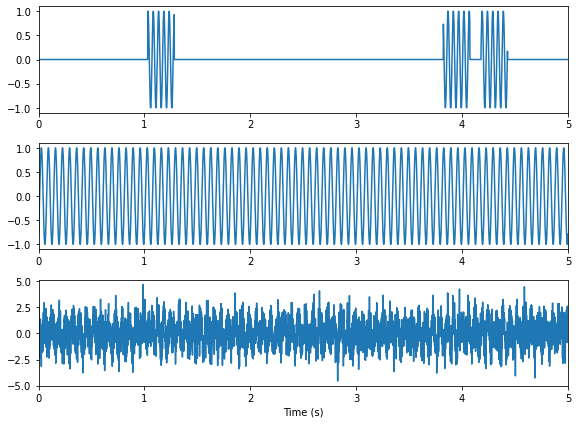

In [13]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

f1 = 20
f1_max_cycles=5
f1_bursts_per_trial=3
f2 = 15
w1 = 2. * np.pi * f1
w2 = 2. * np.pi * f2
signal=np.zeros((trials,len(time)))
s1s=np.zeros((trials,len(time)))
for i in range(trials):
    burst_starts=[]
    burst_stops=[]
    while len(burst_starts)<f1_bursts_per_trial:
        cycles=f1_max_cycles
        cycles_dur_s=cycles/f1
        dur=int(cycles_dur_s/dt)
        start=np.random.randint(int(T/dt)-dur)
        stop=start+dur
        overlap=False
        for (other_start,other_stop) in zip(burst_starts,burst_stops):
            if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                overlap=True
                break
        if not overlap:
            s1s[i,start:stop]=np.sin(w1 * (time[start:stop]+np.random.randn()))
            burst_starts.append(start)
            burst_stops.append(stop)
    s2=np.sin(w2 * (time+np.random.randn()))
    signal[i,:]=s1s[i,:]+s2+cn.powerlaw_psd_gaussian(0, len(time))#np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(time,s1s[0,:])
plt.xlim(time[[0,-1]])
plt.subplot(3,1,2)
plt.plot(time,s2)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,3)
plt.plot(time,signal[0,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [14]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='coh')
trial_lplvs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='plv')
trial_lacs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='amp_coh')

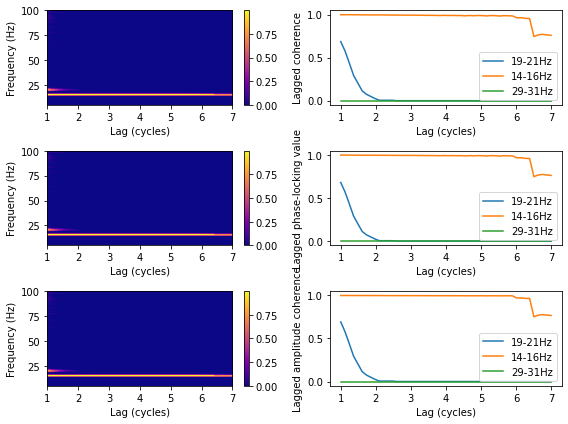

In [15]:
plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
i1=plt.imshow(np.mean(trial_lcs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')

plt.subplot(3,2,3)
i1=plt.imshow(np.mean(trial_lplvs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged phase-locking value')

plt.subplot(3,2,5)
i1=plt.imshow(np.mean(trial_lacs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,6)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged amplitude coherence')
plt.tight_layout()

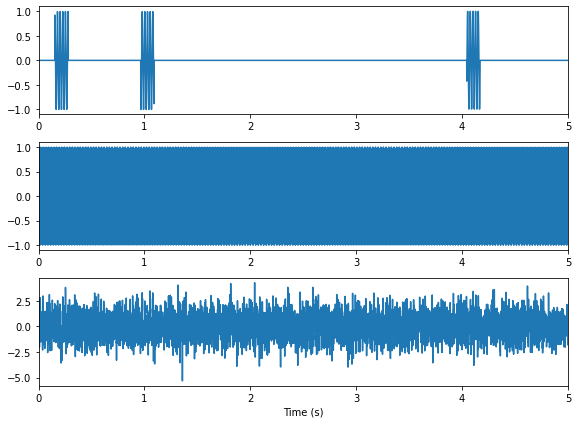

In [16]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

f1 = 40
f1_max_cycles=5
f1_bursts_per_trial=3
f2 = 80
w1 = 2. * np.pi * f1
w2 = 2. * np.pi * f2
signal=np.zeros((trials,len(time)))
s1s=np.zeros((trials,len(time)))
for i in range(trials):
    burst_starts=[]
    burst_stops=[]
    while len(burst_starts)<f1_bursts_per_trial:
        cycles=f1_max_cycles
        cycles_dur_s=cycles/f1
        dur=int(cycles_dur_s/dt)
        start=np.random.randint(int(T/dt)-dur)
        stop=start+dur
        overlap=False
        for (other_start,other_stop) in zip(burst_starts,burst_stops):
            if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                overlap=True
                break
        if not overlap:
            s1s[i,start:stop]=np.sin(w1 * (time[start:stop]+np.random.randn()))
            burst_starts.append(start)
            burst_stops.append(stop)
    s2=np.sin(w2 * (time+np.random.randn()))
    signal[i,:]=s1s[i,:]+s2+cn.powerlaw_psd_gaussian(0, len(time))#np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(time,s1s[0,:])
plt.xlim(time[[0,-1]])
plt.subplot(3,1,2)
plt.plot(time,s2)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,3)
plt.plot(time,signal[0,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [17]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='coh')
trial_lplvs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='plv')
trial_lacs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='amp_coh')

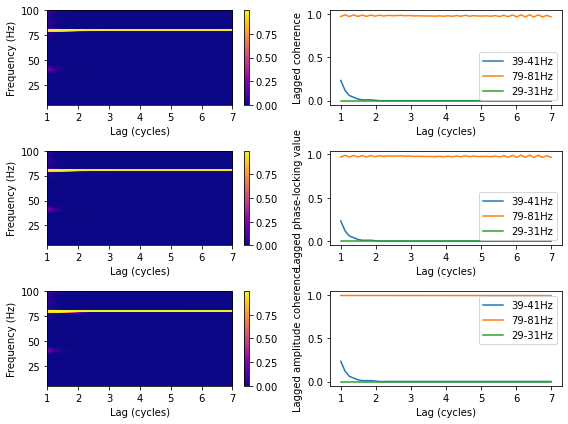

In [18]:
plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
i1=plt.imshow(np.mean(trial_lcs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,2)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lcs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')

plt.subplot(3,2,3)
i1=plt.imshow(np.mean(trial_lplvs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,4)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lplvs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged phase-locking value')

plt.subplot(3,2,5)
i1=plt.imshow(np.mean(trial_lacs_surrogate,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.colorbar(i1)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')
plt.subplot(3,2,6)
low_frange=np.where((freqs>=f1-1) & (freqs<=f1+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,low_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f1-1,f1+1))
high_frange=np.where((freqs>=f2-1) & (freqs<=f2+1))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='{}-{}Hz'.format(f2-1,f2+1))
high_frange=np.where((freqs>=29) & (freqs<=31))[0]
plt.plot(lags,np.mean(np.mean(trial_lacs_surrogate[:,high_frange,:],axis=1),axis=0),label='29-31Hz')
plt.legend()
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged amplitude coherence')
plt.tight_layout()

In [19]:
# dt=.001
# T=5
# trials=100
# time=np.linspace(0,T,int(T/dt))
# srate=1/dt
# freqs=np.linspace(5,100,50)
# lags=np.linspace(.5,7,10)

# err=np.zeros((len(freqs),len(lags)))
# all_lcs=np.zeros((len(freqs),len(lags),len(lags)))
# for f_idx, freq in enumerate(freqs):
#     freq=freqs[f_idx]
#     for l_idx, cycles in enumerate(lags):
#         w = 2. * np.pi * freq
#         bursts_per_trial=5
#         signal=np.zeros((trials,len(time)))
#         for i in range(trials):
#             s=np.zeros((len(time)))
#             for j in range(bursts_per_trial):
#                 cycles_dur_s=cycles/freq
#                 dur=int(cycles_dur_s/dt)
#                 start=np.random.randint(int(T/dt))
#                 s[start:start+dur]=np.sin(w * (time[start:start+dur]+np.random.randn()))
#             signal[i,:]=s+np.random.uniform(-1,1,len(time))
#         lcs=lagged_surrogate_coherence2(signal, freqs, lags, srate)

#         m_lcs=np.mean(lcs,axis=0)
#         peak=np.max(m_lcs[f_idx,:])
#         lt=np.where(m_lcs[f_idx,:]<=peak*.5)[0]
#         if len(lt):
#             fwhm=lags[lt[0]]
#         else:
#             fwhm=lags[-1]
#         err[f_idx,l_idx]=cycles-fwhm
#         all_lcs[f_idx,l_idx,:]=m_lcs[f_idx,:]


In [20]:
# #plt.plot(freqs,err)
# im=plt.imshow(err,origin='lower',aspect='auto',extent=[lags[0],lags[-1],freqs[0],freqs[-1]])
# plt.colorbar(im)

In [21]:
# #plt.plot(freqs,err)
# im=plt.imshow(err,origin='lower',aspect='auto',extent=[lags[0],lags[-1],freqs[0],freqs[-1]])
# plt.colorbar(im)

In [22]:
# cool_colors=plt.cm.cool(np.linspace(0,1,len(freqs)))
# for f_idx in range(len(freqs)):
#     plt.plot(lags,all_lcs[f_idx,0,:],color=cool_colors[f_idx])

In [23]:
# cool_colors=plt.cm.cool(np.linspace(0,1,len(lags)))
# for l_idx in range(len(lags)):
#     plt.plot(lags,all_lcs[19,l_idx,:],color=cool_colors[l_idx])

In [32]:
5/10

0.5

In [125]:
dt=.001
T=20
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

freqs=np.linspace(5,100,100)
lags=np.linspace(1,10,50)
    
fs=np.arange(10,80,5)
ls=np.arange(1,6,.5)
ws = 2. * np.pi * fs

freq_lcs=np.zeros((len(ls),len(fs),len(lags)))
for l_idx,l in enumerate(ls):
    cycles=l
    for f_idx,(f,w) in enumerate(zip(fs,ws)):

        cycles_dur_s=cycles/f
        dur=int(cycles_dur_s/dt)
        bursts_per_trial=int((T*.5)/cycles_dur_s)

        signal=np.zeros((trials,len(time)))
        s1s=np.zeros((trials,len(time)))
        for i in range(trials):
            burst_starts=[]
            burst_stops=[]
            while len(burst_starts)<bursts_per_trial:
                start=np.random.randint(int(T/dt)-dur)
                stop=start+dur
                overlap=False
                for (other_start,other_stop) in zip(burst_starts,burst_stops):
                    if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                        overlap=True
                        break
                if not overlap:
                    s1s[i,start:stop]=np.sin(w * (time[start:stop]+np.random.randn()))
                    burst_starts.append(start)
                    burst_stops.append(stop)
            signal[i,:]=s1s[i,:]+cn.powerlaw_psd_gaussian(0, len(time))#np.random.uniform(-1,1,len(time))

        trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, type='coh')
        frange=np.where((freqs>=f-1) & (freqs<=f+1))[0]
        lc=np.mean(np.mean(trial_lcs_surrogate[:,frange,:],axis=1),axis=0)
        freq_lcs[l_idx,f_idx,:]=lc

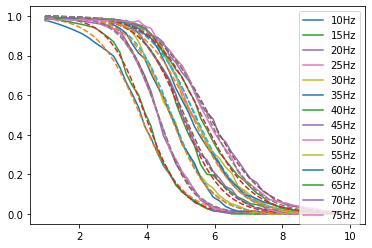

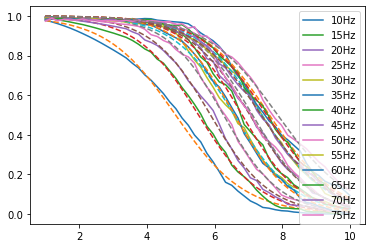

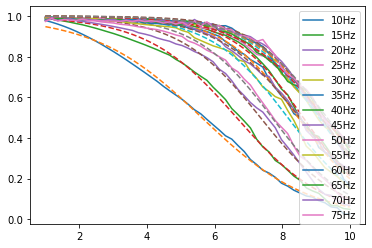

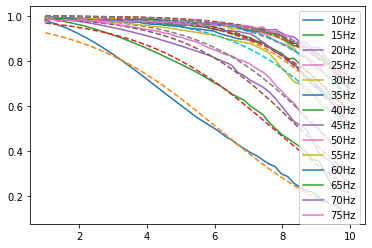

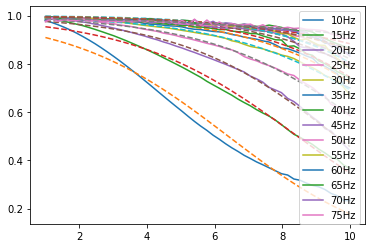

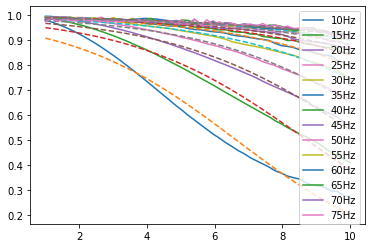

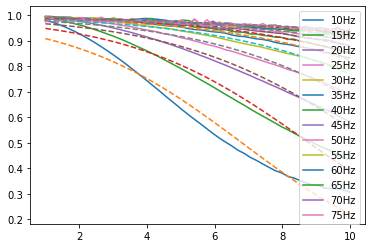

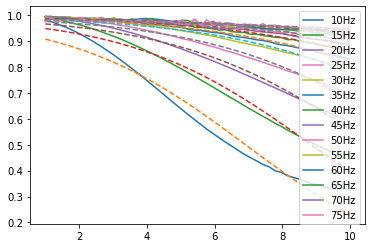

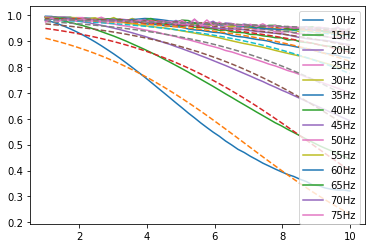

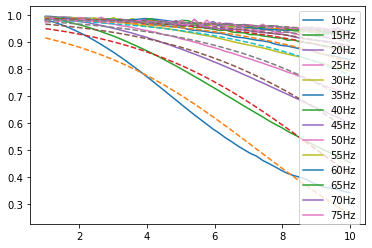

In [131]:
#p0=(1,.1,0)
#p0=(5,3)

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

def sigmoid(x, x0, k):
    L=-1
    b=1
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

x0s=np.zeros((len(ls),len(fs)))
ks=np.zeros((len(ls),len(fs)))

for idx in range(len(ls)):
    #print('{} cycles'.format(ls[idx]))
    plt.figure()
    for f_idx in range(len(fs)):
        plt.plot(lags,freq_lcs[idx,f_idx,:],label='{}Hz'.format(fs[f_idx]))
        xdata=lags
        ydata=freq_lcs[idx,f_idx,:]
        p0 = [np.median(xdata),3]
        popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='lm')
        plt.plot(lags,sigmoid(lags,popt[0],popt[1]),'--')
        #m=freq_lcs[idx,f_idx,0]
        #half=lags[np.min(np.where(freq_lcs[idx,f_idx,1:]<=m*.5)[0])]
        #print('{}Hz'.format(fs[f_idx]))
        #print(popt)
        x0s[idx,f_idx]=popt[0]
        ks[idx,f_idx]=popt[1]
    plt.legend()


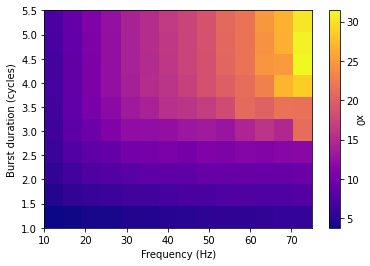

In [132]:
i1=plt.imshow(x0s, aspect='auto', cmap='plasma', 
              extent=[fs[0], fs[-1], ls[0], ls[-1]], 
                  origin='lower')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Burst duration (cycles)')
cb=plt.colorbar(i1)
cb.set_label('x0', rotation=270)
    
# plt.imshow(x0s,)

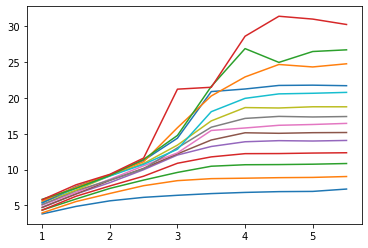

In [133]:
plt.plot(ls,x0s)

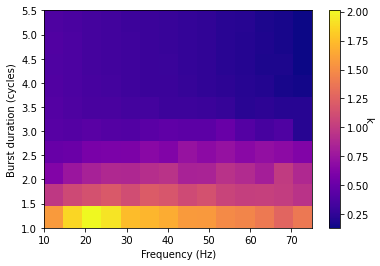

In [134]:
i1=plt.imshow(ks, aspect='auto', cmap='plasma', 
              extent=[fs[0], fs[-1], ls[0], ls[-1]], 
                  origin='lower')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Burst duration (cycles)')
cb=plt.colorbar(i1)
cb.set_label('k', rotation=270)
    
# plt.imshow(x0s,)

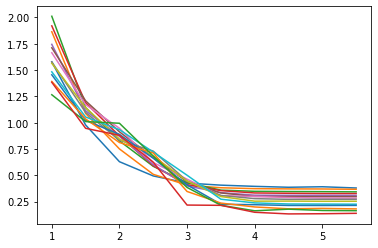

In [135]:
plt.plot(ls,ks)

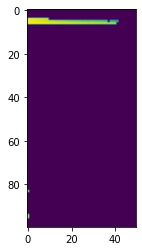

In [22]:
plt.imshow(trial_lcs_surrogate[0,:,:])

In [23]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

freqs=np.linspace(5,100,100)
lags=np.linspace(.5,6,50)
    
max_cycles=4
bursts_per_trial=1

fs=np.arange(10,80,10)
ws = 2. * np.pi * fs

freq_lcs=np.zeros((len(fs),len(lags)))
for f_idx,(f,w) in enumerate(zip(fs,ws)):

    signal=np.zeros((trials,len(time)))
    for i in range(trials):
        s1=np.zeros(len(time))
        burst_starts=[]
        burst_stops=[]
        while len(burst_starts)<bursts_per_trial:
            cycles=max_cycles
            cycles_dur_s=cycles/f
            dur=int(cycles_dur_s/dt)
            start=np.random.randint(int(T/dt)-dur)
            stop=start+dur
            overlap=False
            for (other_start,other_stop) in zip(burst_starts,burst_stops):
                if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                    overlap=True
                    break
            if not overlap:
                s1[start:stop]=s1[start:stop]+np.sin(w * (time[start:stop]+np.random.randn()))
                burst_starts.append(start)
                burst_stops.append(stop)
        signal[i,:]=s1+np.random.uniform(-1,1,len(time))
    trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, thresh_prctile=1)
    frange=np.where((freqs>=f-1) & (freqs<=f+1))[0]
    lc=np.mean(np.mean(trial_lcs_surrogate[:,frange,:],axis=1),axis=0)
    freq_lcs[f_idx,:]=lc

10Hz: max=0.9951112325457891, half=0.4975556162728946, FWHM=4.142857142857142
20Hz: max=0.9920254866526599, half=0.49601274332632994, FWHM=3.020408163265306
30Hz: max=0.9662970214497001, half=0.48314851072485004, FWHM=2.571428571428571
40Hz: max=0.923019502108639, half=0.4615097510543195, FWHM=2.3469387755102042
50Hz: max=0.9260998202306251, half=0.46304991011531255, FWHM=2.571428571428571
60Hz: max=0.9308827938560116, half=0.4654413969280058, FWHM=2.3469387755102042
70Hz: max=0.9030877952063541, half=0.45154389760317704, FWHM=2.795918367346939


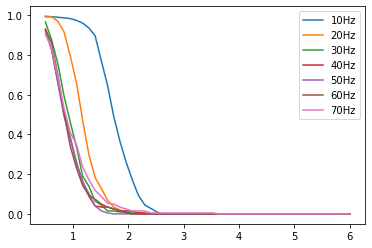

In [24]:
for f_idx in range(freq_lcs.shape[0]):
    plt.plot(lags,freq_lcs[f_idx,:],label='{}Hz'.format(fs[f_idx]))
    m=freq_lcs[f_idx,0]
    #half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=m*.5)[0])]
    half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=.1)[0])]
    print('{}Hz: max={}, half={}, FWHM={}'.format(fs[f_idx],m,m*.5,half))
    #full=lags[np.argmax(np.where(freq_lcs[f_idx,:]>0))]
    #print(full*2)
plt.legend()

In [25]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

freqs=np.linspace(5,100,100)
lags=np.linspace(.5,6,50)
    
max_cycles=5
bursts_per_trial=1

fs=np.arange(10,80,10)
ws = 2. * np.pi * fs

freq_lcs=np.zeros((len(fs),len(lags)))
for f_idx,(f,w) in enumerate(zip(fs,ws)):

    signal=np.zeros((trials,len(time)))
    for i in range(trials):
        s1=np.zeros(len(time))
        burst_starts=[]
        burst_stops=[]
        while len(burst_starts)<bursts_per_trial:
            cycles=max_cycles
            cycles_dur_s=cycles/f
            dur=int(cycles_dur_s/dt)
            start=np.random.randint(int(T/dt)-dur)
            stop=start+dur
            overlap=False
            for (other_start,other_stop) in zip(burst_starts,burst_stops):
                if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                    overlap=True
                    break
            if not overlap:
                s1[start:stop]=s1[start:stop]+np.sin(w * (time[start:stop]+np.random.randn()))
                burst_starts.append(start)
                burst_stops.append(stop)
        signal[i,:]=s1+np.random.uniform(-1,1,len(time))
    trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, thresh_prctile=1)
    frange=np.where((freqs>=f-1) & (freqs<=f+1))[0]
    lc=np.mean(np.mean(trial_lcs_surrogate[:,frange,:],axis=1),axis=0)
    freq_lcs[f_idx,:]=lc

10Hz: max=0.9955072793711479, half=0.49775363968557396, FWHM=5.714285714285714
20Hz: max=0.9970459542437812, half=0.4985229771218906, FWHM=4.142857142857142
30Hz: max=0.9961906066846548, half=0.4980953033423274, FWHM=3.2448979591836733
40Hz: max=0.982558750930294, half=0.491279375465147, FWHM=3.020408163265306
50Hz: max=0.9659640605566545, half=0.48298203027832726, FWHM=2.795918367346939
60Hz: max=0.9653264717022723, half=0.48266323585113613, FWHM=3.020408163265306
70Hz: max=0.9573658291480228, half=0.4786829145740114, FWHM=3.2448979591836733


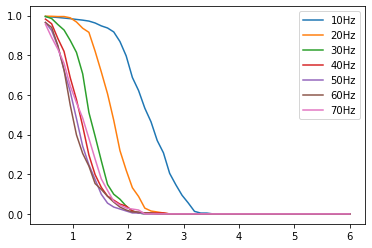

In [26]:
for f_idx in range(freq_lcs.shape[0]):
    plt.plot(lags,freq_lcs[f_idx,:],label='{}Hz'.format(fs[f_idx]))
    m=freq_lcs[f_idx,0]
    #half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=m*.5)[0])]
    half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=.1)[0])]
    print('{}Hz: max={}, half={}, FWHM={}'.format(fs[f_idx],m,m*.5,half))
    #full=lags[np.argmax(np.where(freq_lcs[f_idx,:]>0))]
    #print(full*2)
plt.legend()

In [27]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

freqs=np.linspace(5,100,100)
lags=np.linspace(.5,6,50)
    
max_cycles=6
bursts_per_trial=1

fs=np.arange(10,80,10)
ws = 2. * np.pi * fs

freq_lcs=np.zeros((len(fs),len(lags)))
for f_idx,(f,w) in enumerate(zip(fs,ws)):

    signal=np.zeros((trials,len(time)))
    for i in range(trials):
        s1=np.zeros(len(time))
        burst_starts=[]
        burst_stops=[]
        while len(burst_starts)<bursts_per_trial:
            cycles=max_cycles
            cycles_dur_s=cycles/f
            dur=int(cycles_dur_s/dt)
            start=np.random.randint(int(T/dt)-dur)
            stop=start+dur
            overlap=False
            for (other_start,other_stop) in zip(burst_starts,burst_stops):
                if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                    overlap=True
                    break
            if not overlap:
                s1[start:stop]=s1[start:stop]+np.sin(w * (time[start:stop]+np.random.randn()))
                burst_starts.append(start)
                burst_stops.append(stop)
        signal[i,:]=s1+np.random.uniform(-1,1,len(time))
    trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, thresh_prctile=1)
    frange=np.where((freqs>=f-1) & (freqs<=f+1))[0]
    lc=np.mean(np.mean(trial_lcs_surrogate[:,frange,:],axis=1),axis=0)
    freq_lcs[f_idx,:]=lc

10Hz: max=0.9958605172883038, half=0.4979302586441519, FWHM=7.510204081632653
20Hz: max=0.9970751906125521, half=0.49853759530627606, FWHM=5.489795918367347
30Hz: max=0.996206929531551, half=0.4981034647657755, FWHM=4.591836734693878
40Hz: max=0.9924853933795045, half=0.49624269668975224, FWHM=4.142857142857142
50Hz: max=0.9859052932973643, half=0.49295264664868216, FWHM=3.693877551020408
60Hz: max=0.985016037694519, half=0.4925080188472595, FWHM=3.693877551020408
70Hz: max=0.982049638876385, half=0.4910248194381925, FWHM=3.693877551020408


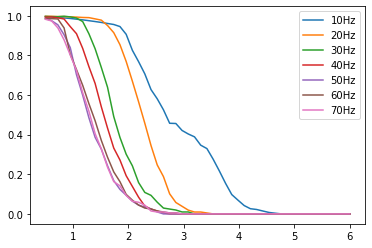

In [28]:
for f_idx in range(freq_lcs.shape[0]):
    plt.plot(lags,freq_lcs[f_idx,:],label='{}Hz'.format(fs[f_idx]))
    m=freq_lcs[f_idx,0]
    #half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=m*.5)[0])]
    half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=.1)[0])]
    print('{}Hz: max={}, half={}, FWHM={}'.format(fs[f_idx],m,m*.5,half))
    #full=lags[np.argmax(np.where(freq_lcs[f_idx,:]>0))]
    #print(full*2)
plt.legend()

In [29]:
dt=.001
T=5
trials=100
time=np.linspace(0,T,int(T/dt))
srate=1/dt

freqs=np.linspace(5,100,100)
lags=np.linspace(.5,6,50)
    
max_cycles=7
bursts_per_trial=1

fs=np.arange(10,80,10)
ws = 2. * np.pi * fs

freq_lcs=np.zeros((len(fs),len(lags)))
for f_idx,(f,w) in enumerate(zip(fs,ws)):

    signal=np.zeros((trials,len(time)))
    for i in range(trials):
        s1=np.zeros(len(time))
        burst_starts=[]
        burst_stops=[]
        while len(burst_starts)<bursts_per_trial:
            cycles=max_cycles
            cycles_dur_s=cycles/f
            dur=int(cycles_dur_s/dt)
            start=np.random.randint(int(T/dt)-dur)
            stop=start+dur
            overlap=False
            for (other_start,other_stop) in zip(burst_starts,burst_stops):
                if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                    overlap=True
                    break
            if not overlap:
                s1[start:stop]=s1[start:stop]+np.sin(w * (time[start:stop]+np.random.randn()))
                burst_starts.append(start)
                burst_stops.append(stop)
        signal[i,:]=s1+np.random.uniform(-1,1,len(time))
    trial_lcs_surrogate=lagged_surrogate_coherence(signal, freqs, lags, srate, thresh_prctile=1)
    frange=np.where((freqs>=f-1) & (freqs<=f+1))[0]
    lc=np.mean(np.mean(trial_lcs_surrogate[:,frange,:],axis=1),axis=0)
    freq_lcs[f_idx,:]=lc

10Hz: max=0.9961315601282412, half=0.4980657800641206, FWHM=10.204081632653061
20Hz: max=0.9971083962899592, half=0.4985541981449796, FWHM=7.73469387755102
30Hz: max=0.9962125466027852, half=0.4981062733013926, FWHM=6.836734693877551
40Hz: max=0.992483201700201, half=0.4962416008501005, FWHM=5.938775510204081
50Hz: max=0.9958608433421258, half=0.4979304216710629, FWHM=5.489795918367347
60Hz: max=0.9850148619603121, half=0.49250743098015604, FWHM=5.938775510204081
70Hz: max=0.9820863766276444, half=0.4910431883138222, FWHM=5.040816326530612


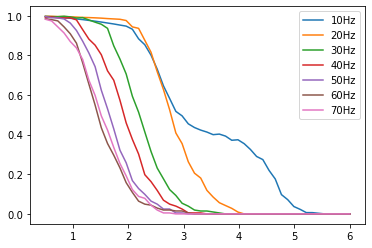

In [30]:
for f_idx in range(freq_lcs.shape[0]):
    plt.plot(lags,freq_lcs[f_idx,:],label='{}Hz'.format(fs[f_idx]))
    m=freq_lcs[f_idx,0]
    #half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=m*.5)[0])]
    if np.min(freq_lcs[f_idx,:])<=.1:
        half=2*lags[np.min(np.where(freq_lcs[f_idx,1:]<=.01)[0])]
    else:
        half=2*lags[-1]
    print('{}Hz: max={}, half={}, FWHM={}'.format(fs[f_idx],m,m*.5,half))
    #full=lags[np.argmax(np.where(freq_lcs[f_idx,:]>0))]
    #print(full*2)
plt.legend()